In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
train_path = "/content/gdrive/MyDrive/651_project/Preprocess_fin_data/new_data/train_processed.csv"
test_path = "/content/gdrive/MyDrive/651_project/Preprocess_fin_data/new_data/test_processed.csv"
validation_path = "/content/gdrive/MyDrive/651_project/Preprocess_fin_data/new_data/validation_processed.csv"

In [ ]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
validation_df = pd.read_csv(validation_path)

In [ ]:
train_df.info()
test_df.info()
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     287113 non-null  object
 1   highlights  287113 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     11490 non-null  object
 1   highlights  11490 non-null  object
dtypes: object(2)
memory usage: 179.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13368 entries, 0 to 13367
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     13368 non-null  object
 1   highlights  13368 non-null  object
dtypes: object(2)
memory usage: 209.0+ KB


The dataset is too large, for training prupose, I will limit the size of train, test and vaild set.

In [ ]:
train_df = train_df.head(110000)
test_df = test_df.head(10500)
validation_df = validation_df.head(10500)
# JUST in case after I flitered the outliner, it will have at least 110000 rows in train, 10000 in validation and test


In [ ]:
train_df[:5]

,article,highlights
0,washington pilots northwest flight fall asleep...,soseq first officer completely load radio freq...
1,freya noble daily mail australia australia ico...,soseq counting costs climate change coastal fl...
2,sanaa thousands yemeni air force personnel ral...,soseq air force rallies across yemen calling c...
3,afghan soldier shot killed nato soldier monday...,soseq new attack afghan coalition forces herat...
4,caracas venezuela shortages basic products cor...,soseq consumers struggled years shortages basi...


1. parameter setting:

need to set a maximum length of both article and highlights

In [ ]:
article_count = []
for sent in train_df['article']:
  article_count.append(len(sent.split()))

highlight_count = []
for sent in train_df['highlights']:
  highlight_count.append(len(sent.split()))

In [ ]:
graph_df= pd.DataFrame()
graph_df['article_length']=article_count
graph_df['highlight_lenght']=highlight_count

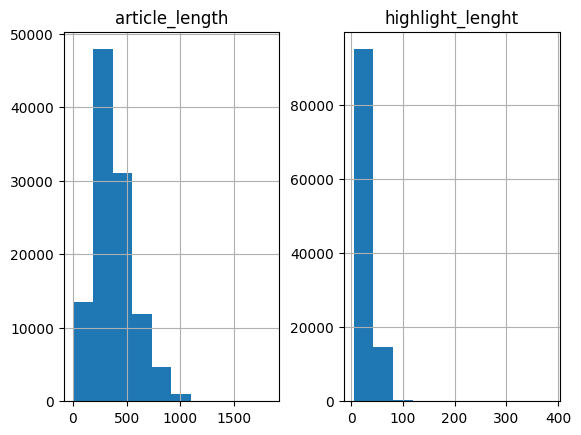

In [ ]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 10)
plt.show()

In [ ]:
cnt_art=0
for i in train_df['article']:
    if(len(i.split())<=800):
        cnt_art=cnt_art+1
print(cnt_art/len(train_df['article']))

print("_________________________________________________")

cnt_hig=0
for i in train_df['highlights']:
    if(len(i.split())<=100):
        cnt_hig=cnt_hig+1
print(cnt_hig/len(train_df['highlights']))

0.9681545454545455
_________________________________________________
0.9989636363636364


In [ ]:
cnt_art=0
for i in train_df['article']:
    if(len(i.split())<=600):
        cnt_art=cnt_art+1
print(cnt_art/len(train_df['article']))

print("_________________________________________________")

cnt_hig=0
for i in train_df['highlights']:
    if(len(i.split())<=80):
        cnt_hig=cnt_hig+1
print(cnt_hig/len(train_df['highlights']))

0.8806545454545455
_________________________________________________
0.9962636363636364


In [ ]:
cnt_art=0
for i in train_df['article']:
    if(len(i.split())<=700):
        cnt_art=cnt_art+1
print(cnt_art/len(train_df['article']))

print("_________________________________________________")

0.9358090909090909
_________________________________________________


In [ ]:
cnt_hig=0
for i in train_df['highlights']:
    if(len(i.split())<=60):
        cnt_hig=cnt_hig+1
print(cnt_hig/len(train_df['highlights']))

0.9764727272727273


In [ ]:
cnt_hig=0
for i in train_df['highlights']:
    if(len(i.split())<=50):
        cnt_hig=cnt_hig+1
print(cnt_hig/len(train_df['highlights']))

0.9377727272727273


In [ ]:
"""
train_df['article']:
<=600 : 0.8806
<=700 : 0.9358
<=800 : 0.9681

train_df['highlights']:
<=50 : 0.9377
<=60 : 0.9764
<=80 : 0.9882
<=100 : 0.9941
"""

max_text_len=700
max_summary_len=60

In [ ]:
import numpy as np
cleaned_text =np.array(train_df['article'])
cleaned_summary=np.array(train_df['highlights'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

post_train=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
cleaned_text =np.array(test_df['article'])
cleaned_summary=np.array(test_df['highlights'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

post_test=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
cleaned_text =np.array(validation_df['article'])
cleaned_summary=np.array(validation_df['highlights'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

post_validation=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
post_train.info()
post_test.info()
post_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101133 entries, 0 to 101132
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     101133 non-null  object
 1   summary  101133 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9532 non-null   object
 1   summary  9532 non-null   object
dtypes: object(2)
memory usage: 149.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9538 non-null   object
 1   summary  9538 non-null   object
dtypes: object(2)
memory usage: 149.2+ KB


In [ ]:
post_train.to_csv('/content/gdrive/MyDrive/651_project/post_data/post_train.csv', index=False)
post_test.to_csv('/content/gdrive/MyDrive/651_project/post_data/post_test.csv', index=False)
post_validation.to_csv('/content/gdrive/MyDrive/651_project/post_data/post_validation.csv', index=False)

LOAD HERE, Ignore above code

In [ ]:
post_train = pd.read_csv('/content/gdrive/MyDrive/651_project/post_data/post_train.csv')
post_test = pd.read_csv('/content/gdrive/MyDrive/651_project/post_data/post_test.csv')
post_validation = pd.read_csv('/content/gdrive/MyDrive/651_project/post_data/post_validation.csv')

Tokenlization

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences

In [ ]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(post_train["text"]))

# define the threshold
threshold = 10
count = 0 # Number of rare words
total_count = 0
freq = 0
total_freq = 0

for key, value in x_tokenizer.word_counts.items():
  total_count += 1
  if value < threshold:
    count += 1
common_words = total_count - count
print(common_words)

72091


In [ ]:
x_tokenizer = Tokenizer(num_words=common_words)
x_tokenizer.fit_on_texts(list(post_train["text"]))

x_train_seq = x_tokenizer.texts_to_sequences(post_train["text"])
x_val_seq = x_tokenizer.texts_to_sequences(post_validation["text"])
x_test_seq = x_tokenizer.texts_to_sequences(post_test["text"])

x_train = pad_sequences(x_train_seq, maxlen=max_text_len, padding="post")
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding="post")
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding="post")

x_vocab = x_tokenizer.num_words + 1
print(f"size of input (X) vocabulary: {x_vocab}")

size of input (X) vocabulary: 72092


In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(post_train["summary"]))

threshold = 10
count = 0 # Number of rare words
total_count = 0
freq = 0
total_freq = 0

for key, value in y_tokenizer.word_counts.items():
  total_count += 1
  if value < threshold:
    count += 1

common_words = total_count - count
print(common_words)

21180


In [ ]:
y_tokenizer = Tokenizer(num_words=common_words)
y_tokenizer.fit_on_texts(list(post_train["summary"]))

y_train_seq = y_tokenizer.texts_to_sequences(post_train["summary"])
y_val_seq = y_tokenizer.texts_to_sequences(post_validation["summary"])
y_test_seq = y_tokenizer.texts_to_sequences(post_test["summary"])

y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding="post")
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding="post")
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding="post")

y_vocab = y_tokenizer.num_words + 1
print(f"size of output (Y) vocabulary: {y_vocab}")

size of output (Y) vocabulary: 21181


In [ ]:
x_train[0]

array([  484,  3571,  4661,   522,   936,  4398,  3850,   529,   365,
         128,  3186,   518,   631,     1,   259,  3390,   109, 22329,
         522,     6,  3571,   345,  8652,  2192,  2163,     7,    46,
        4308,   295,  5560,  3715,   219,  4686,   141,   693,  4687,
         281,  1377,   393,   614,   317, 17168,   214,  8449,  3990,
        3850,   801,  8988,     1,   518,   631,     5, 26917,   486,
        3476,   893,   281,  1377,   393, 15724,  8988,   109,  1625,
         986,   341,   824,  1050, 26029,   522,  2662,  6327, 20285,
        3571, 10227,  2662,  2163,  9376,  1313,  2662,  6327,  5843,
           7,  3440, 11642,    35,   228,   594,  6327,  8587,   954,
        1926,  1136,    36,   824,   522,   925,  2019,   509,  3021,
         710,  4097,  2194,   794,   281,  1377,  9031,  3619,  1202,
        7276,   287,  1129,  8427,   628,  1559,    11,   378,  3187,
        8427,   287,   506,    19,  3596,  8427,   134,  2345,   957,
          11,   378,

In [ ]:
y_train[0]

array([    1,    15,   303,  2263,  8418,  1300, 11796,  5081,     3,
        1032,  7517,  3577,   983,  3437,  5081,     3,  5081,    11,
        2606,   239,  1239,  8168, 14634,   860,   309,     2,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int32)

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/651_project/model_atten/xtokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/gdrive/MyDrive/651_project/model_atten/ytokenizer.pickle', 'wb') as handle:
    pickle.dump(y_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

LOAD HERE: IGnore code before


In [ ]:
import pickle
# Load x_tokenizer
with open('/content/gdrive/MyDrive/651_project/model_atten/xtokenizer.pickle', 'rb') as handle:
    x_tokenizer = pickle.load(handle)

# Load y_tokenizer
with open('/content/gdrive/MyDrive/651_project/model_atten/ytokenizer.pickle', 'rb') as handle:
    y_tokenizer = pickle.load(handle)
x_vocab = x_tokenizer.num_words + 1
print(f"size of input (X) vocabulary: {x_vocab}")
y_vocab = y_tokenizer.num_words + 1
print(f"size of output (Y) vocabulary: {y_vocab}")

max_text_len=700
max_summary_len=60

x_train_seq = x_tokenizer.texts_to_sequences(post_train["text"])
x_val_seq = x_tokenizer.texts_to_sequences(post_validation["text"])
x_test_seq = x_tokenizer.texts_to_sequences(post_test["text"])


x_train = pad_sequences(x_train_seq, maxlen=max_text_len, padding="post")
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding="post")
x_test = pad_sequences(x_test_seq, maxlen=max_text_len, padding="post")

y_train_seq = y_tokenizer.texts_to_sequences(post_train["summary"])
y_val_seq = y_tokenizer.texts_to_sequences(post_validation["summary"])
y_test_seq = y_tokenizer.texts_to_sequences(post_test["summary"])

y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding="post")
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding="post")
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding="post")

size of input (X) vocabulary: 72092
size of output (Y) vocabulary: 21181


Continue

In [ ]:
y_tokenizer.word_counts['soseq'],len(y_train)
# soseq and eoseq

(101133, 101133)

In [ ]:
y_tokenizer.word_counts['eoseq'],len(y_train)

(101133, 101133)

Modeling


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

# cited from https://github.com/thushv89/attention_keras/blob/master/src/layers/attention.py

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError: # If TPU not found
  tpu = None

In [ ]:
if tpu:
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  #strategy = tf.distribute.experimental.TPUStrategy(tpu)
  strategy = tf.distribute.TPUStrategy(tpu)
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
else:
  strategy = tf.distribute.get_strategy() # Default strategy that works on CPU and single GPU
  print('Running on CPU instead')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.54.75.226:8470']
Number of accelerators:  8


In [ ]:
from keras import backend as K
K.clear_session()

latent_dim = 256
embedding_dim= 128

In [ ]:
with strategy.scope():
  encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
  enc_emb =  Embedding(x_vocab, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
  encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
  encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
  encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
  encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
  encoder_lstm3 = LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
  encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
  decoder_inputs = Input(shape=(None,))

#embedding layer
  dec_emb_layer = Embedding(y_vocab, embedding_dim,trainable=True)
  dec_emb = dec_emb_layer(decoder_inputs)

  decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
  decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
  attn_layer = AttentionLayer(name='attention_layer')
  attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
  decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
  decoder_dense =  TimeDistributed(Dense(y_vocab, activation='softmax'))
  decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
  model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
  model.summary()
  model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 700)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 700, 128)     9227776     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 700, 256),   394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
#history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
791/791 [==============================] - 740s 892ms/step - loss: 4.1318 - val_loss: 4.3896
Epoch 2/50
791/791 [==============================] - 675s 853ms/step - loss: 4.0223 - val_loss: 4.3796
Epoch 3/50
791/791 [==============================] - 675s 853ms/step - loss: 3.9908 - val_loss: 4.3218
Epoch 4/50
791/791 [==============================] - 675s 853ms/step - loss: 3.9576 - val_loss: 4.2928
Epoch 5/50
791/791 [==============================] - 675s 854ms/step - loss: 3.9291 - val_loss: 4.2323
Epoch 6/50
791/791 [==============================] - 675s 853ms/step - loss: 3.9060 - val_loss: 4.2150
Epoch 7/50
791/791 [==============================] - 675s 853ms/step - loss: 3.8849 - val_loss: 4.1832
Epoch 8/50
791/791 [==============================] - 675s 854ms/step - loss: 3.8540 - val_loss: 4.1434
Epoch 9/50
791/791 [==============================] - 675s 854ms/step - loss: 3.8107 - val_loss: 4.1126
Epoch 10/50
791/791 [==============================] - 676s 854m

In [ ]:
model.load_weights("/content/gdrive/MyDrive/651_project/model_atten/atten_model_weights.h5")

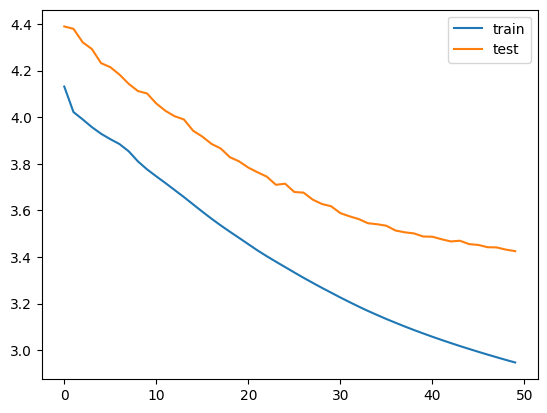

In [ ]:
"""
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
"""

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))
dec_emb2= dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])
decoder_outputs2 = decoder_dense(decoder_inf_concat)
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
# reference from https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

In [ ]:
# soseq and eoseq
# sostok = soseq
# eostok = eoseq
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_word_index['soseq']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eoseq'):
            decoded_sentence += ' '+sampled_token
        if (sampled_token == 'eoseq'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        e_h, e_c = h, c

    return decoded_sentence
# reference from https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['soseq']) and i!=target_word_index['eoseq']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
rewiew = []
ori_sum = []
pred_sum = []
for i in range(0,500):
    #print("Review:",seq2text(x_test[i]))
    #print("Original summary:",seq2summary(y_test[i]))
    #print("Predicted summary:",decode_sequence(x_test[i].reshape(1,max_text_len)))
    #print("\n")
    rewiew.append(seq2text(x_test[i]))
    ori_sum.append(seq2summary(y_test[i]))
    pred_sum.append(decode_sequence(x_test[i].reshape(1,max_text_len)))


流式输出内容被截断，只能显示最后 5000 行内容。
1/1 [==============================] - 0s 74ms/step


Evaluate

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=43539441298c20ae2f2755d00459e3a3d1e3f6b01c96984e06ef9fcc09a09a3b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

In [ ]:
rouge_score_arr = []
for i in range(len(rewiew)):
    scores = scorer.score(ori_sum[i],pred_sum[i])
    rouge_score_arr.append(scores)
rouge_score_arr

[{'rouge1': Score(precision=0.047619047619047616, recall=0.045454545454545456, fmeasure=0.046511627906976744),
  'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0),
  'rougeL': Score(precision=0.047619047619047616, recall=0.045454545454545456, fmeasure=0.046511627906976744)},
 {'rouge1': Score(precision=0.10526315789473684, recall=0.1, fmeasure=0.10256410256410256),
  'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0),
  'rougeL': Score(precision=0.10526315789473684, recall=0.1, fmeasure=0.10256410256410256)},
 {'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0),
  'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0),
  'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)},
 {'rouge1': Score(precision=0.2, recall=0.20833333333333334, fmeasure=0.20408163265306126),
  'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0),
  'rougeL': Score(precision=0.16, recall=0.16666666666666666, fmeasure=0.16326530612244897)},
 {'rouge1': Score(precision=0.310344827586206

In [ ]:
rouge1_precision_scores = [score['rouge1'].precision for score in rouge_score_arr]
average_rouge1_precision = sum(rouge1_precision_scores) / len(rouge1_precision_scores)
print("Average Rouge-1 Precision:", average_rouge1_precision)

Average Rouge-1 Precision: 0.11455770721207106


In [ ]:
rouge1_recall_scores = [score['rouge1'].recall for score in rouge_score_arr]
average_rouge1_recall = sum(rouge1_recall_scores) / len(rouge1_recall_scores)
print("Average Rouge-1 Recall:", average_rouge1_recall)

Average Rouge-1 Recall: 0.08653940939899722


In [ ]:
rouge1_fmeasure_scores = [score['rouge1'].fmeasure for score in rouge_score_arr]
average_rouge1_fmeasure = sum(rouge1_fmeasure_scores) / len(rouge1_fmeasure_scores)
print("Average Rouge-1 fmeasure:", average_rouge1_fmeasure)

Average Rouge-1 fmeasure: 0.09574618547354839


In [ ]:
rouge2_precision_scores = [score['rouge2'].precision for score in rouge_score_arr]
average_rouge2_precision = sum(rouge2_precision_scores) / len(rouge2_precision_scores)
print("Average Rouge-2 Precision:", average_rouge2_precision)

Average Rouge-2 Precision: 0.016080046575507875


In [ ]:
rouge2_recall_scores = [score['rouge2'].recall for score in rouge_score_arr]
average_rouge2_recall = sum(rouge2_recall_scores) / len(rouge2_recall_scores)
print("Average Rouge-2 Recall:", average_rouge2_recall)

Average Rouge-2 Recall: 0.012516541549830933


In [ ]:
rouge2_fmeasure_scores = [score['rouge2'].fmeasure for score in rouge_score_arr]
average_rouge2_fmeasure = sum(rouge2_fmeasure_scores) / len(rouge2_fmeasure_scores)
print("Average Rouge-2 fmeasure:", average_rouge2_fmeasure)

Average Rouge-2 fmeasure: 0.013696016245889684
